***LOADING THE DATASETS***

**FETCHING THE TOKENS AND LABELS AND MAPPING THEM ACCORDINGLY**

In [ ]:
%pip install datasets
%pip install seqeval
from datasets import load_dataset, load_metric
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset("surrey-nlp/PLOD-CW")
training_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]
column_names = training_dataset.column_names

sentences_train=training_dataset['tokens']
labels_train=training_dataset['ner_tags']
pos_tags=training_dataset['pos_tags']

sentences_val=val_dataset['tokens']
labels_val=val_dataset['ner_tags']

sentences_test=test_dataset['tokens']
labels_test=test_dataset['ner_tags']

datasets = ['Train', 'Validation', 'Test']
total_words = [len(sentences_train), len(sentences_val), len(sentences_test)]
label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list_train = []
for sample in labels_train:
    label_list_train.append([label_encoding[tag] for tag in sample])

label_list_test = []
for sample in labels_test:
    label_list_test.append([label_encoding[tag] for tag in sample])

label_list_val = []
for sample in labels_val:
    label_list_val.append([label_encoding[tag] for tag in sample])


FOR PLOTTIING

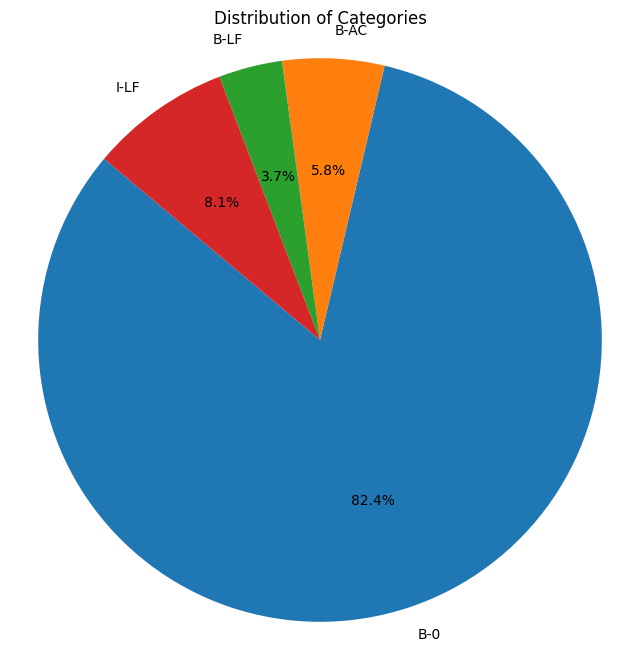

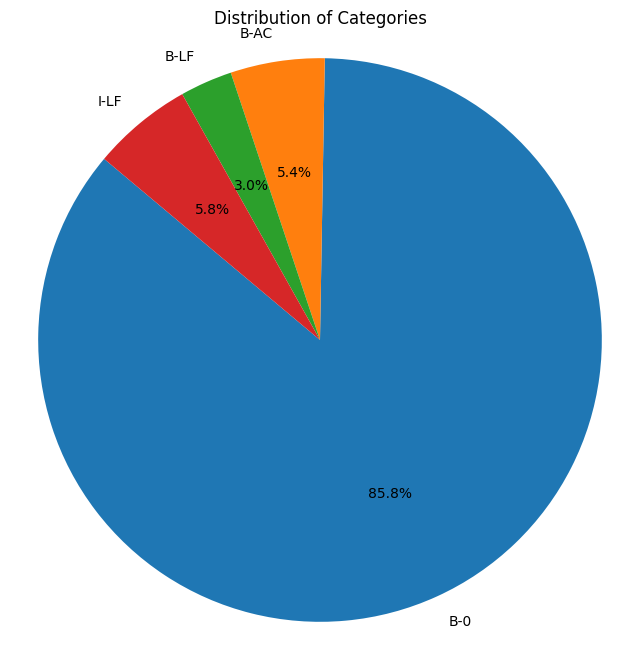

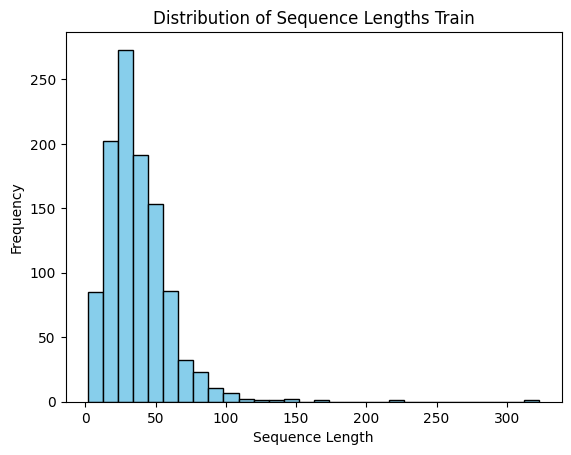

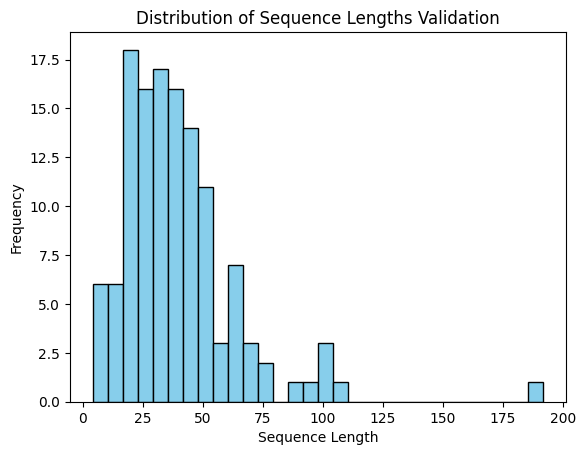

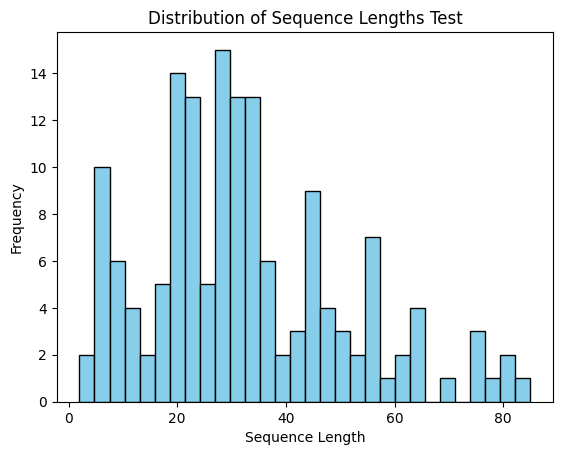

In [ ]:

flatten_labels_train = sum(label_list_train, [])
flatten_labels_test = sum(label_list_test, [])


labels = ['B-0', 'B-AC', 'B-LF', 'I-LF']
sizes = [flatten_labels_train.count(0), flatten_labels_train.count(1), flatten_labels_train.count(2), flatten_labels_train.count(3)]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Categories')
plt.show()

labels = ['B-0', 'B-AC', 'B-LF', 'I-LF']
sizes = [flatten_labels_test.count(0), flatten_labels_test.count(1), flatten_labels_test.count(2), flatten_labels_test.count(3)]  
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Categories')
plt.show()


sentence_lengths = [len(sentence) for sentence in sentences_train]

# Plotting the histogram
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths Train')
plt.show()


sentence_lengths = [len(sentence) for sentence in sentences_val]

# Plotting the histogram
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths Validation')
plt.show()


sentence_lengths = [len(sentence) for sentence in sentences_test]

# Plotting the histogram
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths Test')
plt.show()




      Dataset  Number of Sentences  Max length of Sequence
0    Training                 1072                     323
1  Validation                  126                     192
2        Test                  153                      85


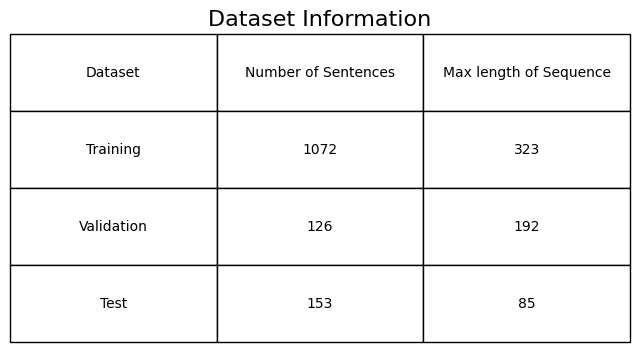

In [ ]:
max_length_train = max(len(sentence) for sentence in sentences_train)
max_length_val = max(len(sentence) for sentence in sentences_val)
max_length_test = max(len(sentence) for sentence in sentences_test)
data = {
    'Dataset': ['Training', 'Validation', 'Test'],
    'Number of Sentences': [len(sentences_train), len(sentences_val), len(sentences_test)],
    'Max length of Sequence':[max_length_train, max_length_val, max_length_test]
}
df = pd.DataFrame(data)
print(df)

plt.figure(figsize=(8, 4))
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
plt.axis('off') 
plt.title('Dataset Information', fontsize=16)
plt.show()


**TRAINING WORD2VEC**

In [14]:
print(sentences_train[0])
print(sentences_val[0])
print(sentences_test[0])

['For', 'this', 'purpose', 'the', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', '(', 'GYPES', ')', 'was', 'developed', '.']
['=', 'Manual', 'Ability', 'Classification', 'System', ';', 'QUEST', '=', 'Quest', '-', 'Quality', 'of', 'upper', 'extremity', 'skills', 'test', ';', 'Cont', '=', 'control', ';', 'M', '=', 'male', ',', 'F', '=', 'female', ',', 'V', '=', 'verbal', ',', 'nonV', '=', 'non', '-', 'Verbal', ',', '|Quad', '=', 'quadriplegia', ',', 'Di', '=', 'Diplegia', ',', 'Hemi', '=', 'hemiplegia', '.']
['Abbreviations', ':', 'GEMS', ',', 'Global', 'Enteric', 'Multicenter', 'Study', ';', 'VIP', ',', 'ventilated', 'improved', 'pit', '.']


In [ ]:
import numpy as np
import gensim
from gensim.models import Word2Vec,FastText

vectorSize=200
modelWord2Vec = gensim.models.Word2Vec(sentences_train,window=3,min_count=1,workers=4,vector_size=vectorSize)
modelWord2Vec.train(sentences_train, total_examples=len(sentences_train), epochs=200)
modelWord2Vec.wv.most_similar('DNA')[:5]


**GETTING WORD2VEC EMBEDDINGS**

RUN IT IF VECTORIZATION IS WORD2VEC


In [16]:
padding_value=4

from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
length_padding=100;
vectorized_words_train = []
vectorized_sentence_train = []
vectorized_sentence_validation = []
vectorized_words_validation= []

for sentence in sentences_train:
     vectorized_words_train= []
     for word in sentence:
            vectorized_words_train.append(modelWord2Vec.wv[word])
     vectorized_sentence_train.append(vectorized_words_train)


for sentence in sentences_val:
     vectorized_words_val= []
     for word in sentence:
          if word not in modelWord2Vec.wv.key_to_index:
            word_embedding = np.ones(200)
            vectorized_words_val.append(word_embedding)
          else:
            vectorized_words_val.append(modelWord2Vec.wv[word])
     vectorized_sentence_validation.append(vectorized_words_val)

padded_sentences_train= pad_sequences(vectorized_sentence_train,length_padding, padding='post', dtype='float32')
padded_labels_train = pad_sequences(label_list_train, length_padding,padding='post', dtype='float32', value=padding_value)
padded_sentences_val= pad_sequences(vectorized_sentence_validation,length_padding, padding='post', dtype='float32')
padded_labels_val = pad_sequences(label_list_val, length_padding,padding='post', dtype='float32', value=padding_value)



print(len(sentences_test))

vectorized_sentence_test= []
for sentence in sentences_test:
     vectorized_words_test= []
     for word in sentence:
            if word not in modelWord2Vec.wv.key_to_index:
              word_embedding = np.ones(200)
              vectorized_words_test.append(word_embedding)
            else:
              vectorized_words_test.append(modelWord2Vec.wv[word])
     vectorized_sentence_test.append(np.array(vectorized_words_test))

print(len(vectorized_sentence_test))
padded_sentences_test= pad_sequences(vectorized_sentence_test,100, padding='post', dtype='float32')
padded_labels_test = pad_sequences(label_list_test, 100,padding='post', dtype='float32', value=4)
print(padded_labels_test[0])


153
153
[0. 0. 1. 0. 2. 3. 3. 3. 0. 1. 0. 2. 3. 3. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4.]


**LSTM**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, SimpleRNN, Masking,Conv1D, MaxPooling1D, RNN, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalFocalCrossentropy, CategoricalCrossentropy


model= Sequential()
model.add(Masking(mask_value = 0.,input_shape=(100, vectorSize)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(4,activation='softmax'))
loss = SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=4,
    reduction="sum_over_batch_size",
    name="sparse_categorical_crossentropy",
)

optimizer = Adam(learning_rate=0.005)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])


model.fit(padded_sentences_train, padded_labels_train, batch_size=16, epochs=50, validation_data=(padded_sentences_val,padded_labels_val))

**getting metrics of LSTM WORD2VEC***

In [ ]:


from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
import seaborn as sns

predicted_probabilities = model.predict(padded_sentences_test)
len(padded_sentences_test)
len(padded_labels_test)

predicted_classes = np.argmax(predicted_probabilities, axis=2)
padded_labels_test[0]
predicted_classes[0]

filtered_padded_labels_test = padded_labels_test.tolist()
filtered_predicted_classes=predicted_classes.tolist()

for pred, labels in zip(filtered_predicted_classes, filtered_padded_labels_test):

    indices_to_remove = []  
    for i, item in enumerate(labels[:]): 
        if item == 4:
            labels.remove(item)
            indices_to_remove.append(i)  
    for index in reversed(indices_to_remove):
        pred.pop(index)
label_map = {
    0: 'B-O',
    1: 'B-AC',
    2: 'B-LF',
    3: 'I-LF',
    4:'pad'
}
predicted_classes_mapped = []
for instance in filtered_predicted_classes:
    mapped_instance = [label_map[label] for label in instance]
    predicted_classes_mapped.append(mapped_instance)
predicted_classes_mapped[5]
padded_labels_test_mapped= []
for instance in filtered_padded_labels_test:
    mapped_instance = [label_map[label] for label in instance]
    padded_labels_test_mapped.append(mapped_instance)

y_true = padded_labels_test_mapped
y_pred = predicted_classes_mapped

print(f1_score(y_true, y_pred, zero_division=0))
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

true_labels_flat = [label for sublist in y_true for label in sublist]
predicted_labels_flat = [label for sublist in y_pred for label in sublist]

# Get unique labels
unique_labels = ['B-O','B-AC', 'B-LF', 'I-LF', 'pad']

confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
for true_label, predicted_label in zip(true_labels_flat, predicted_labels_flat):
    true_index = unique_labels.index(true_label)
    predicted_index = unique_labels.index(predicted_label)
    confusion_matrix[true_index][predicted_index] += 1

print("\t" + "\t".join(unique_labels))
for i, label in enumerate(unique_labels):
    print(label + "\t" + "\t".join(str(count) for count in confusion_matrix[i]))
print("WORD2VEC WITH LSTM")

5/5 [==============================] - 3s 37ms/step
0.7789403383793411
0.7344
              precision    recall  f1-score   support

          AC       0.50      0.34      0.40       270
          LF       0.11      0.37      0.17       152
           O       0.93      0.78      0.85      4292

   micro avg       0.82      0.74      0.78      4714
   macro avg       0.52      0.50      0.48      4714
weighted avg       0.88      0.74      0.80      4714

	B-O	B-AC	B-LF	I-LF	pad
B-O	3352	79	227	634	0
B-AC	91	91	53	35	0
B-LF	61	3	61	25	0
I-LF	93	8	19	168	0
pad	0	0	0	0	0
WORD2VEC WITH LSTM


***FAST TEXT***
RUN IT WHEN YOU USE FAST TEXT

In [ ]:
import numpy as np
import gensim
import warnings
vectorSize=200


modelFastText= gensim.models.FastText(sentences_train,window=3,min_count=1,workers=4,vector_size=vectorSize)

modelFastText.train(sentences_train, total_examples=len(sentences_train), epochs=200)

warnings.filterwarnings("ignore")

**WITH FASTTEXT EMBEDDINGS**
RUN IT WHEN YOU USE FAST TEXT

In [20]:
padding_value=4

from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
length_padding=100;
vectorized_words_train = []
vectorized_sentence_train = []
vectorized_sentence_validation = []
vectorized_words_validation= []

for sentence in sentences_train:
     vectorized_words_train= []
     for word in sentence:
            vectorized_words_train.append(modelFastText.wv[word])
     vectorized_sentence_train.append(vectorized_words_train)


for sentence in sentences_val:
     vectorized_words_val= []
     for word in sentence:
          if word not in modelFastText.wv.key_to_index:
            similar_word=modelFastText.wv.most_similar(word)[0][0]

            vectorized_words_val.append(modelFastText.wv[similar_word])
          else:
            vectorized_words_val.append(modelFastText.wv[word])
     vectorized_sentence_validation.append(vectorized_words_val)

padded_sentences_train= pad_sequences(vectorized_sentence_train,length_padding, padding='post', dtype='float32')
padded_labels_train = pad_sequences(label_list_train, length_padding,padding='post', dtype='float32', value=padding_value)
padded_sentences_val= pad_sequences(vectorized_sentence_validation,length_padding, padding='post', dtype='float32')
padded_labels_val = pad_sequences(label_list_val, length_padding,padding='post', dtype='float32', value=padding_value)



print(len(sentences_test))

vectorized_sentence_test= []
for sentence in sentences_test:
     vectorized_words_test= []
     for word in sentence:
            if word not in modelFastText.wv.key_to_index:
              similar_word=modelFastText.wv.most_similar(word)[0][0]

              vectorized_words_val.append(modelFastText.wv[similar_word])
            else:
              vectorized_words_test.append(modelFastText.wv[word])
     vectorized_sentence_test.append(np.array(vectorized_words_test))

print(len(vectorized_sentence_test))
padded_sentences_test= pad_sequences(vectorized_sentence_test,100, padding='post', dtype='float32')
padded_labels_test = pad_sequences(label_list_test, 100,padding='post', dtype='float32', value=4)


153
153


**EXPERIMENT WITH ALGORITHMS**

RUN IT WHEN YOU USE RNN

In [ ]:
list_of_models=[]
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, SimpleRNN, Masking,Conv1D, MaxPooling1D, RNN, Activation
from tensorflow.keras.optimizers import Adam, SGD, AdamW
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalFocalCrossentropy, CategoricalCrossentropy

model= Sequential()
model.add(Masking(mask_value = 0.,input_shape=(100, vectorSize)))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dense(4,activation='softmax'))
loss = SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=4,
    reduction="sum_over_batch_size",
    name="sparse_categorical_crossentropy",
)

optimizer = Adam(learning_rate=0.005)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(padded_sentences_train, padded_labels_train, batch_size=16, epochs=50, validation_data=(padded_sentences_val,padded_labels_val))

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
import seaborn as sns


print("RNN with FastText")


predicted_probabilities = model.predict(padded_sentences_test)
len(padded_sentences_test)
len(padded_labels_test)

predicted_classes = np.argmax(predicted_probabilities, axis=2)
#predicted_classes[0]
padded_labels_test[0]
predicted_classes[0]

filtered_padded_labels_test = padded_labels_test.tolist()
filtered_predicted_classes=predicted_classes.tolist()

for pred, labels in zip(filtered_predicted_classes, filtered_padded_labels_test):
   
    indices_to_remove = []

    
    for i, item in enumerate(labels[:]): 
        if item == 4:
            labels.remove(item)
            indices_to_remove.append(i)  
    for index in reversed(indices_to_remove):
        pred.pop(index)

label_map = {
    0: 'B-O',
    1: 'B-AC',
    2: 'B-LF',
    3: 'I-LF',
    4:'pad'
}

# Map numerical labels to string labels
predicted_classes_mapped = []
for instance in filtered_predicted_classes:
    mapped_instance = [label_map[label] for label in instance]
    predicted_classes_mapped.append(mapped_instance)

predicted_classes_mapped[5]
padded_labels_test_mapped= []
for instance in filtered_padded_labels_test:
    mapped_instance = [label_map[label] for label in instance]
    padded_labels_test_mapped.append(mapped_instance)
y_true = padded_labels_test_mapped
y_pred = predicted_classes_mapped

print("F1 SCORE: ",f1_score(y_true, y_pred, zero_division=0))
list_of_models.append(f1_score(y_true, y_pred, zero_division=0))

print("ACCURACY SCORE: ", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

true_labels_flat = [label for sublist in y_true for label in sublist]
predicted_labels_flat = [label for sublist in y_pred for label in sublist]
unique_labels = ['B-O','B-AC', 'B-LF', 'I-LF', 'pad']
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
for true_label, predicted_label in zip(true_labels_flat, predicted_labels_flat):
    true_index = unique_labels.index(true_label)
    predicted_index = unique_labels.index(predicted_label)
    confusion_matrix[true_index][predicted_index] += 1
print("\t" + "\t".join(unique_labels))
for i, label in enumerate(unique_labels):
    print(label + "\t" + "\t".join(str(count) for count in confusion_matrix[i]))



RNN with FastText
5/5 [==============================] - 1s 36ms/step
F1 SCORE:  0.8453113591321582
ACCURACY SCORE:  0.8178
              precision    recall  f1-score   support

          AC       0.18      0.07      0.10       270
          LF       0.05      0.05      0.05       152
           O       0.87      0.94      0.90      4292

   micro avg       0.83      0.86      0.85      4714
   macro avg       0.37      0.35      0.35      4714
weighted avg       0.81      0.86      0.83      4714

	B-O	B-AC	B-LF	I-LF	pad
B-O	4026	68	87	111	0
B-AC	237	19	10	4	0
B-LF	118	7	9	16	0
I-LF	237	11	5	35	0
pad	0	0	0	0	0


**RUN IT WHEN YOU USE LSTM**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, SimpleRNN, Masking,Conv1D, MaxPooling1D, RNN, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalFocalCrossentropy, CategoricalCrossentropy


model= Sequential()
model.add(Masking(mask_value = 0.,input_shape=(100, vectorSize)))

model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dense(8,activation='softmax'))
model.add(Dense(4,activation='softmax'))
loss = SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=4,
    reduction="sum_over_batch_size",
    name="sparse_categorical_crossentropy",
)

optimizer = Adam(learning_rate=0.005)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(padded_sentences_train, padded_labels_train, batch_size=16, epochs=50, validation_data=(padded_sentences_val,padded_labels_val))

67/67 [==============================] - 6s 84ms/step - loss: 0.0314 - accuracy: 0.9946 - val_loss: 0.5903 - val_accuracy: 0.8741
Epoch 47/50
67/67 [==============================] - 7s 98ms/step - loss: 0.0307 - accuracy: 0.9950 - val_loss: 0.5962 - val_accuracy: 0.8717
Epoch 48/50
67/67 [==============================] - 6s 83ms/step - loss: 0.0291 - accuracy: 0.9952 - val_loss: 0.6100 - val_accuracy: 0.8690
Epoch 49/50
67/67 [==============================] - 6s 96ms/step - loss: 0.0280 - accuracy: 0.9950 - val_loss: 0.6270 - val_accuracy: 0.8710
Epoch 50/50
67/67 [==============================] - 6s 88ms/step - loss: 0.0327 - accuracy: 0.9934 - val_loss: 0.6144 - val_accuracy: 0.8649


In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
import seaborn as sns

predicted_probabilities = model.predict(padded_sentences_test)
len(padded_sentences_test)
len(padded_labels_test)

predicted_classes = np.argmax(predicted_probabilities, axis=2)
padded_labels_test[0]
predicted_classes[0]

filtered_padded_labels_test = padded_labels_test.tolist()
filtered_predicted_classes=predicted_classes.tolist()

for pred, labels in zip(filtered_predicted_classes, filtered_padded_labels_test):
    indices_to_remove = []  

   
    for i, item in enumerate(labels[:]): 
        if item == 4:
            labels.remove(item)
            indices_to_remove.append(i)  
    for index in reversed(indices_to_remove):
        pred.pop(index)
label_map = {
    0: 'B-O',
    1: 'B-AC',
    2: 'B-LF',
    3: 'I-LF',
    4:'pad'
}
predicted_classes_mapped = []
for instance in filtered_predicted_classes:
    mapped_instance = [label_map[label] for label in instance]
    predicted_classes_mapped.append(mapped_instance)
predicted_classes_mapped[5]
padded_labels_test_mapped= []
for instance in filtered_padded_labels_test:
    mapped_instance = [label_map[label] for label in instance]
    padded_labels_test_mapped.append(mapped_instance)
y_true = padded_labels_test_mapped
y_pred = predicted_classes_mapped


print("F1 SCORE: ",f1_score(y_true, y_pred, zero_division=0))
list_of_models.append(f1_score(y_true, y_pred, zero_division=0))
print("ACCURACY SCORE: ", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
true_labels_flat = [label for sublist in y_true for label in sublist]
predicted_labels_flat = [label for sublist in y_pred for label in sublist]

unique_labels = ['B-O','B-AC', 'B-LF', 'I-LF', 'pad']
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
for true_label, predicted_label in zip(true_labels_flat, predicted_labels_flat):
    true_index = unique_labels.index(true_label)
    predicted_index = unique_labels.index(predicted_label)
    confusion_matrix[true_index][predicted_index] += 1
print("\t" + "\t".join(unique_labels))
for i, label in enumerate(unique_labels):
    print(label + "\t" + "\t".join(str(count) for count in confusion_matrix[i]))

print("LSTM WITH FASTTEXT")

5/5 [==============================] - 3s 42ms/step
F1 SCORE:  0.8447842480100545
ACCURACY SCORE:  0.8162
              precision    recall  f1-score   support

          AC       0.20      0.09      0.12       270
          LF       0.05      0.05      0.05       152
           O       0.87      0.93      0.90      4292

   micro avg       0.83      0.86      0.84      4714
   macro avg       0.38      0.36      0.36      4714
weighted avg       0.81      0.86      0.83      4714

	B-O	B-AC	B-LF	I-LF	pad
B-O	4002	77	72	141	0
B-AC	235	24	5	6	0
B-LF	112	7	11	20	0
I-LF	227	11	6	44	0
pad	0	0	0	0	0
LSTM WITH FASTTEXT


**RUN IT WHEN YOU USE FFNN**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, SimpleRNN, Masking,Conv1D, MaxPooling1D, RNN, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalFocalCrossentropy, CategoricalCrossentropy


model= Sequential()
model.add(Masking(mask_value = 0.,input_shape=(100, vectorSize)))

model.add(Dense(64,activation='softmax'))
model.add(Dense(32,activation='softmax'))
loss = SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=4,
    reduction="sum_over_batch_size",
    name="sparse_categorical_crossentropy",
)

optimizer = Adam(learning_rate=0.005)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(padded_sentences_train, padded_labels_train, batch_size=16, epochs=50, validation_data=(padded_sentences_val,padded_labels_val))

RUN- > FFNN

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
import seaborn as sns

predicted_probabilities = model.predict(padded_sentences_test)
len(padded_sentences_test)
len(padded_labels_test)

predicted_classes = np.argmax(predicted_probabilities, axis=2)
#predicted_classes[0]
padded_labels_test[0]
predicted_classes[0]

filtered_padded_labels_test = padded_labels_test.tolist()
filtered_predicted_classes=predicted_classes.tolist()

for pred, labels in zip(filtered_predicted_classes, filtered_padded_labels_test):
    
    indices_to_remove = []  
    for i, item in enumerate(labels[:]):  
        if item == 4:
            labels.remove(item)
            indices_to_remove.append(i)  
    for index in reversed(indices_to_remove):
        pred.pop(index)
label_map = {
    0: 'B-O',
    1: 'B-AC',
    2: 'B-LF',
    3: 'I-LF',
    4:'pad'
}

predicted_classes_mapped = []
for instance in filtered_predicted_classes:
    mapped_instance = [label_map[label] for label in instance]
    predicted_classes_mapped.append(mapped_instance)

predicted_classes_mapped[5]
padded_labels_test_mapped= []
for instance in filtered_padded_labels_test:
    mapped_instance = [label_map[label] for label in instance]
    padded_labels_test_mapped.append(mapped_instance)
y_true = padded_labels_test_mapped
y_pred = predicted_classes_mapped


print("F1 SCORE: ",f1_score(y_true, y_pred, zero_division=0))
list_of_models.append(f1_score(y_true, y_pred, zero_division=0))

print("ACCURACY SCORE: ", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

true_labels_flat = [label for sublist in y_true for label in sublist]
predicted_labels_flat = [label for sublist in y_pred for label in sublist]

unique_labels = ['B-O','B-AC', 'B-LF', 'I-LF', 'pad']
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)

for true_label, predicted_label in zip(true_labels_flat, predicted_labels_flat):
    true_index = unique_labels.index(true_label)
    predicted_index = unique_labels.index(predicted_label)
    confusion_matrix[true_index][predicted_index] += 1
print("\t" + "\t".join(unique_labels))
for i, label in enumerate(unique_labels):
    print(label + "\t" + "\t".join(str(count) for count in confusion_matrix[i]))

print("ffnn with fasttext")

5/5 [==============================] - 0s 6ms/step
F1 SCORE:  0.7201976528721433
ACCURACY SCORE:  0.7
              precision    recall  f1-score   support

          AC       0.07      0.25      0.11       270
          LF       0.00      0.00      0.00       152
           O       0.86      0.80      0.83      4292

   micro avg       0.70      0.74      0.72      4714
   macro avg       0.31      0.35      0.31      4714
weighted avg       0.78      0.74      0.76      4714

	B-O	B-AC	B-LF	I-LF	pad
B-O	3430	854	0	8	0
B-AC	201	68	0	1	0
B-LF	129	20	0	1	0
I-LF	250	36	0	2	0
pad	0	0	0	0	0
ffnn with fasttext


In [27]:
print(list_of_models)

[0.8453113591321582, 0.8447842480100545, 0.7201976528721433]


**THE CONFUSION MATRIX CAN BE SEEN BETWEEN THE CELLS**